# Code Examples from Hands-On Machine Learning with Scikit-Learn and Tensor Flow by Aurelien Geron, O'Reilly https://github.com/ageron/handson-ml

## Setup
First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [10]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# MNIST

This example uses the `dense()`, `conv2d()` and `dropout()` functions (respectively) from the `tf.layers` module.

For all these functions:
* the `scope` parameter was renamed to `name`, and the `_fn` suffix was removed in all the parameters that had it (for example the `activation_fn` parameter was renamed to `activation`).

The other main differences in `tf.layers.dense()` are:
* the `weights` parameter was renamed to `kernel` (and the weights variable is now named `"kernel"` rather than `"weights"`),
* the default activation is `None` instead of `tf.nn.relu`

The other main differences in `tf.layers.conv2d()` are:
* the `num_outputs` parameter was renamed to `filters`,
* the `stride` parameter was renamed to `strides`,
* the default `activation` is now `None` instead of `tf.nn.relu`.

The other main differences in `tf.layers.dropout()` are:
* it takes the dropout rate (`rate`) rather than the keep probability (`keep_prob`). Of course, `rate == 1 - keep_prob`,
* the `is_training` parameters was renamed to `training`.

In [12]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.compat.v1.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.compat.v1.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

RuntimeError: tf.placeholder() is not compatible with eager execution.

Note: if you are using Python 3.6 on OSX, you need to run the following command on terminal to install the certifi package of certificates because Python 3.6 on OSX has no certificates to validate SSL connections (see this [StackOverflow question](https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error)):

    $ /Applications/Python\ 3.6/Install\ Certificates.command

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [14]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.99 Test accuracy: 0.9763
1 Train accuracy: 0.99 Test accuracy: 0.9801
2 Train accuracy: 0.97 Test accuracy: 0.9836
3 Train accuracy: 0.99 Test accuracy: 0.9873
4 Train accuracy: 1.0 Test accuracy: 0.9884
5 Train accuracy: 0.97 Test accuracy: 0.9897
6 Train accuracy: 1.0 Test accuracy: 0.9901
7 Train accuracy: 0.99 Test accuracy: 0.9899
8 Train accuracy: 1.0 Test accuracy: 0.9893
9 Train accuracy: 1.0 Test accuracy: 0.9889


In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [14]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


Epoch 1/5
1875/1875 [==============================] - 1s 678us/step - loss: 0.2966 - accuracy: 0.9128
Epoch 2/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.1437 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 1s 614us/step - loss: 0.1062 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 1s 622us/step - loss: 0.0887 - accuracy: 0.9727
Epoch 5/5
313/313 [==============================] - 0s 410us/step - loss: 0.0710 - accuracy: 0.9786


[0.07098542153835297, 0.978600025177002]

In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [39]:
train_labels[1]

0

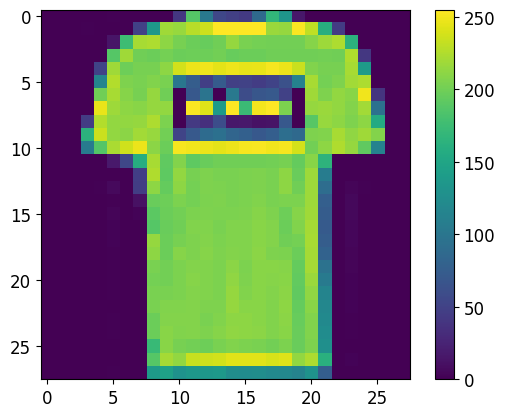

In [23]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0


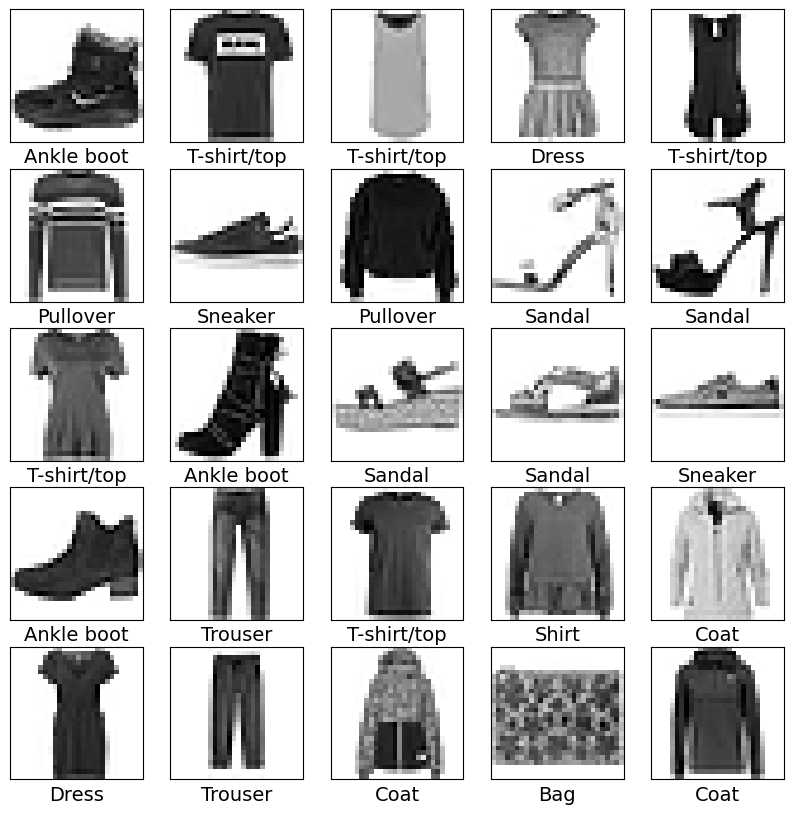

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [28]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 1s 615us/step - loss: 0.4943 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 1s 593us/step - loss: 0.3705 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 1s 604us/step - loss: 0.3350 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 1s 598us/step - loss: 0.3099 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 1s 597us/step - loss: 0.2935 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 1s 593us/step - loss: 0.2771 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 1s 590us/step - loss: 0.2655 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 1s 591us/step - loss: 0.2533 - accuracy: 0.9072
Epoch 9/10
1875/1875 [==============================] - 1s 597us/step - loss: 0.2438 - accuracy: 0.9097
Epoch 10/10
1875/1875 [==============================] - 1s 629u

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3322 - accuracy: 0.8855 - 166ms/epoch - 531us/step

Test accuracy: 0.8855000138282776


In [30]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [31]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 380us/step


In [32]:
predictions[0]


array([5.1316754e-08, 1.1027167e-09, 4.2097295e-07, 5.4898074e-08,
       1.3984092e-07, 1.5889620e-03, 8.4841627e-09, 1.4871836e-02,
       8.7276213e-09, 9.8353851e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])


9

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


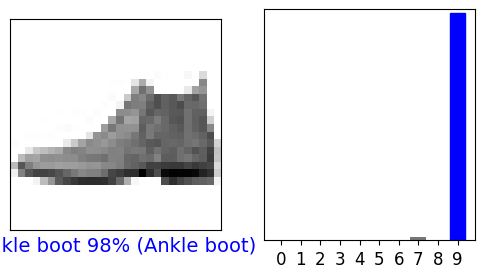

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


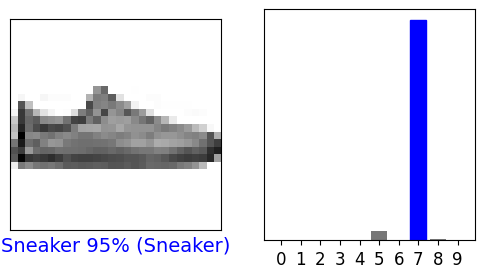

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


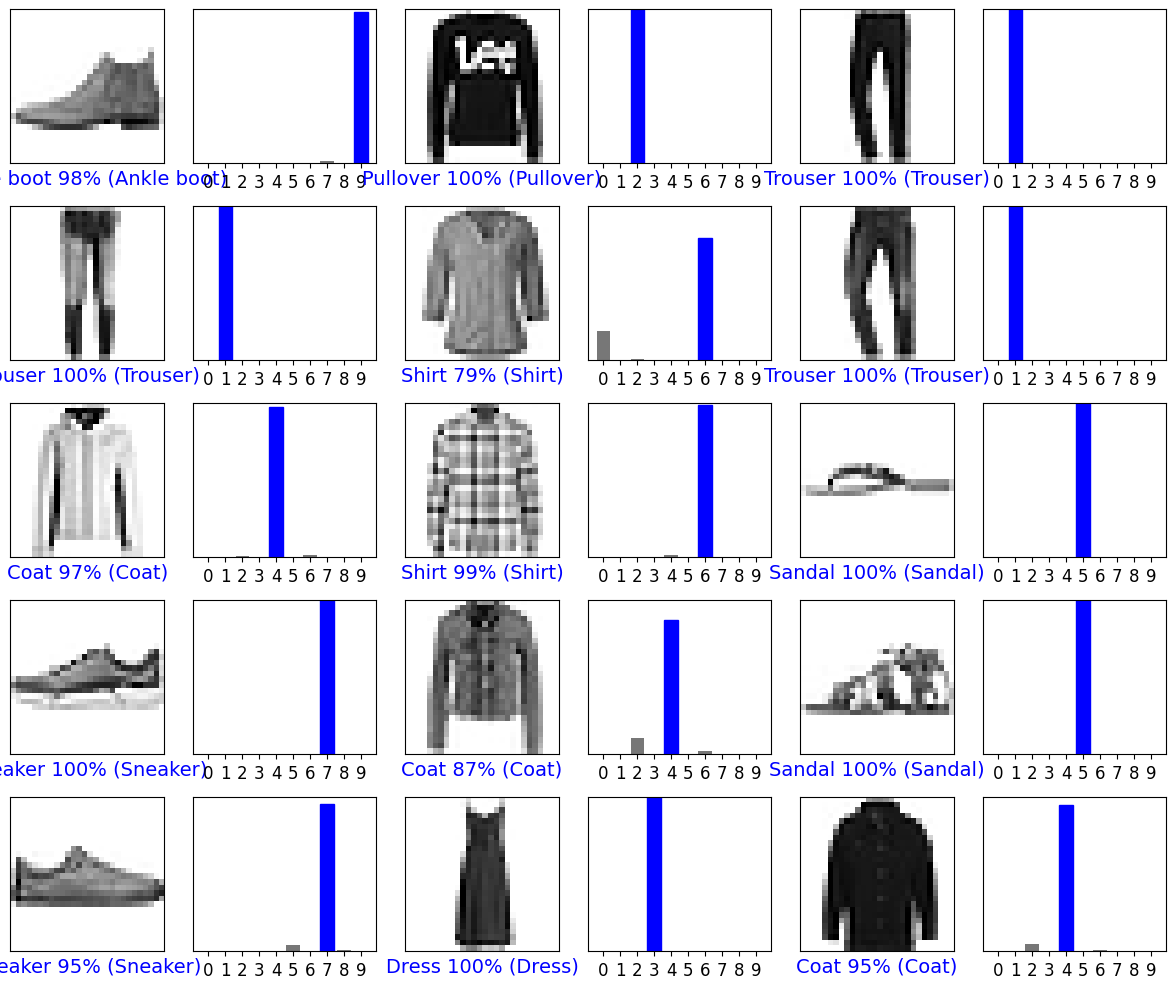

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
